In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
file_path3 = "Data_Sources/title.basics.tsv.gz"
title_basics_df = pd.read_csv(file_path3, compression='gzip', sep='\t')
title_basics_df.head()

C:\Users\amudd\AppData\Local\Temp\ipykernel_3580\882156001.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  title_basics_df = pd.read_csv(file_path3, compression='gzip', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
title_basics_df.nunique()

tconst            9590764
titleType              11
primaryTitle      4365467
originalTitle     4386780
isAdult                11
startYear             152
endYear                97
runtimeMinutes        885
genres               2343
dtype: int64

In [4]:
for i in title_basics_df.columns:
    print(i, len(title_basics_df[i].unique()))

tconst 9590764
titleType 11
primaryTitle 4365468
originalTitle 4386781
isAdult 11
startYear 152
endYear 97
runtimeMinutes 885
genres 2344


In [5]:
title_basics_df.isnull().sum()

tconst             0
titleType          0
primaryTitle      11
originalTitle     11
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

In [6]:
middle_index = len(title_basics_df) // 2

#displaying first few rows and last few rows around the middle
print(title_basics_df.iloc[middle_index-5:middle_index+5])

             tconst  titleType     primaryTitle    originalTitle isAdult  \
4795377   tt1828259      short     Oi kanapedes     Oi kanapedes       0   
4795378  tt18282600  tvEpisode  Episode #1.2627  Episode #1.2627       0   
4795379  tt18282602  tvEpisode  Episode #1.2628  Episode #1.2628       0   
4795380  tt18282604  tvEpisode  Episode #1.2629  Episode #1.2629       0   
4795381  tt18282606  tvEpisode  Episode #1.2630  Episode #1.2630       0   
4795382   tt1828260      movie     On the Ropes     On the Ropes       0   
4795383  tt18282610  tvEpisode  Episode #1.2632  Episode #1.2632       0   
4795384  tt18282612  tvEpisode  Episode #1.2631  Episode #1.2631       0   
4795385  tt18282614  tvEpisode  Episode #1.2633  Episode #1.2633       0   
4795386  tt18282616  tvEpisode  Episode #1.2634  Episode #1.2634       0   

        startYear endYear runtimeMinutes                      genres  
4795377      1998      \N              5                       Short  
4795378        \N    

In [7]:
title_types = title_basics_df['titleType'].value_counts()
print(title_types)

tvEpisode       7264307
short            912329
movie            634711
video            270131
tvSeries         238109
tvMovie          140300
tvMiniSeries      47111
tvSpecial         40402
videoGame         33439
tvShort            9923
tvPilot               2
Name: titleType, dtype: int64


#### For the movie recommendation system we only need the movies and all values associated with movies ####

In [8]:
movietitle_df = title_basics_df[title_basics_df['titleType'] == 'movie']
movietitle_df                          

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
...,...,...,...,...,...,...,...,...,...
9590655,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
9590682,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
9590694,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
9590704,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [9]:
#originalTitle (string) - original title, in the original language. We do need this column as primaryTitle is the title when film was released to public.
movietitle_df = movietitle_df.drop(columns=['originalTitle'])

In [10]:
movietitle_df = movietitle_df.reset_index(drop=True)
movietitle_df.tail(30)

,tconst,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres
634681,tt9915456,movie,Faith's Choice,0,\N,\N,\N,Drama
634682,tt9915536,movie,Side Effect,0,\N,\N,\N,"Action,Sci-Fi"
634683,tt9915592,movie,A Husband to Rent,0,1974,\N,\N,Comedy
634684,tt9915736,movie,Liebestraum,0,\N,\N,\N,Musical
634685,tt9915790,movie,Bobbyr Bondhura,0,2019,\N,106,Family
634686,tt9915808,movie,Salt Lake,0,\N,\N,\N,"Drama,Thriller"
634687,tt9915872,movie,The Last White Witch,0,2019,\N,97,"Comedy,Drama,Fantasy"
634688,tt9915946,movie,Nuestra película,0,1993,\N,96,Documentary
634689,tt9916058,movie,"Cali: ayer, hoy y mañana",0,1995,\N,250,Documentary
634690,tt9916100,movie,Inventing Robert Capa,0,\N,\N,\N,"Biography,Drama,War"


In [11]:
#Checking for popular movies
target_titles = ['Avatar', 'Avengers', 'Star Wars', 'Superbad', 'Thor', 'Avengers: Endgame']
mask = movietitle_df['primaryTitle'].isin(target_titles)
result = movietitle_df.loc[mask]
print(result)

            tconst titleType       primaryTitle isAdult startYear endYear  \
97569    tt0154182     movie             Avatar       0      1941      \N   
154530   tt0278325     movie             Avatar       0      1916      \N   
214632   tt0499549     movie             Avatar       0      2009      \N   
217404   tt0800369     movie               Thor       0      2011      \N   
219303   tt0829482     movie           Superbad       0      2007      \N   
325693  tt14473344     movie               Thor       0      1985      \N   
375186   tt1775309     movie             Avatar       0      2011      \N   
501646   tt4154796     movie  Avengers: Endgame       0      2019      \N   
529458   tt5151440     movie               Thor       0      1962      \N   

       runtimeMinutes                    genres  
97569              \N                     Drama  
154530             50             Drama,Fantasy  
214632            162  Action,Adventure,Fantasy  
217404            115        

In [12]:
freq_ofN = movietitle_df[movietitle_df == '\\N'].count()
print(freq_ofN)

tconst                 0
titleType              0
primaryTitle           0
isAdult                0
startYear          88112
endYear           634711
runtimeMinutes    233954
genres             71758
dtype: int64


In [13]:
movietitle_df.shape

(634711, 8)

In [14]:
file_path6 = "Data_Sources/title.ratings.tsv.gz"
title_ratings_df = pd.read_csv(file_path6, compression='gzip', sep='\t')
title_ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1949
1,tt0000002,5.8,264
2,tt0000003,6.5,1779
3,tt0000004,5.6,179
4,tt0000005,6.2,2583


In [15]:
title_ratings_df.shape

(1276330, 3)

In [16]:
title_ratings_df.nunique()

tconst           1276330
averageRating         91
numVotes           21031
dtype: int64

In [17]:
title_ratings_df.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [18]:
print (title_ratings_df.shape)
print (movietitle_df.shape)

(1276330, 3)
(634711, 8)


In [19]:
#Need to filter ratings df to only display ratings of movies, then merge on tconst.
movie_title_ratings_df = title_ratings_df[title_ratings_df["tconst"].isin(title_basics_df[title_basics_df["titleType"] == "movie"]["tconst"])]
movie_title_ratings_df.head(10)

,tconst,averageRating,numVotes
8,tt0000009,5.3,204
144,tt0000147,5.2,466
325,tt0000502,4.1,15
357,tt0000574,6.0,808
364,tt0000591,4.4,20
378,tt0000615,4.3,24
385,tt0000630,2.8,26
415,tt0000675,4.2,20
417,tt0000679,5.2,67
525,tt0000862,4.4,17


In [20]:
movie_title_ratings_df = movie_title_ratings_df.reset_index(drop=True)
movie_title_ratings_df.head(10)

,tconst,averageRating,numVotes
0,tt0000009,5.3,204
1,tt0000147,5.2,466
2,tt0000502,4.1,15
3,tt0000574,6.0,808
4,tt0000591,4.4,20
5,tt0000615,4.3,24
6,tt0000630,2.8,26
7,tt0000675,4.2,20
8,tt0000679,5.2,67
9,tt0000862,4.4,17


In [21]:
print(movietitle_df.shape)
print(movie_title_ratings_df.shape)

(634711, 8)
(286806, 3)


In [22]:
#merging the dataframes
merged_df = pd.merge(movietitle_df, movie_title_ratings_df, on='tconst', how='inner')
merged_df.tail(30)

,tconst,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
286776,tt9910930,movie,Jeg ser deg,0,2019,\N,75,"Crime,Documentary",5.6,9
286777,tt9911006,movie,Ormma,0,2019,\N,127,Drama,6.9,9
286778,tt9911196,movie,The Marriage Escape,0,2020,\N,103,"Comedy,Drama",7.5,2841
286779,tt9911306,movie,Kalikkoottukar,0,2019,\N,145,"Drama,Romance",3.2,22
286780,tt9911774,movie,Padmavyuhathile Abhimanyu,0,2019,\N,130,Drama,8.5,378
286781,tt9913056,movie,Swarm Season,0,2019,\N,86,Documentary,6.6,36
286782,tt9913084,movie,Diabolik sono io,0,2019,\N,75,Documentary,6.8,48
286783,tt9913660,movie,No Apology,0,2019,\N,102,Drama,5.6,68
286784,tt9913872,movie,De la piel del Diablo,0,2019,\N,75,Thriller,3.4,16
286785,tt9913936,movie,Paradise,0,2019,\N,135,"Crime,Drama",7.5,59


In [23]:
merged_df.shape

(286806, 10)

In [24]:
#Checking for popular movies again
mask = merged_df['primaryTitle'].isin(target_titles)
result = merged_df.loc[mask]
print(result)

           tconst titleType       primaryTitle isAdult startYear endYear  \
74447   tt0154182     movie             Avatar       0      1941      \N   
105316  tt0278325     movie             Avatar       0      1916      \N   
138358  tt0499549     movie             Avatar       0      2009      \N   
139795  tt0800369     movie               Thor       0      2011      \N   
141157  tt0829482     movie           Superbad       0      2007      \N   
195680  tt1775309     movie             Avatar       0      2011      \N   
240287  tt4154796     movie  Avengers: Endgame       0      2019      \N   
250579  tt5151440     movie               Thor       0      1962      \N   

       runtimeMinutes                    genres  averageRating  numVotes  
74447              \N                     Drama            6.3        23  
105316             50             Drama,Fantasy            7.2        28  
138358            162  Action,Adventure,Fantasy            7.9   1318619  
139795         

In [25]:
group_genre = merged_df.groupby('genres').mean()
top_rated_genres = group_genre.sort_values(by='averageRating', ascending=False)

In [26]:
group_genre

,averageRating,numVotes
genres,,
Action,5.656624,179.110522
"Action,Adult",5.675000,62.000000
"Action,Adult,Adventure",5.150000,157.000000
"Action,Adult,Comedy",4.250000,154.000000
"Action,Adult,Crime",5.222222,37.111111
...,...,...
"Thriller,Western",5.733333,1455.400000
War,6.063655,77.683778
"War,Western",5.530000,1729.900000


In [27]:
top_rated_genres

,averageRating,numVotes
genres,,
"Biography,Comedy,War",9.9,57.0
"Documentary,News,Reality-TV",9.4,35.5
"Family,Music,Sport",9.1,19.0
"Adult,Drama,Sci-Fi",8.9,14.0
"Musical,Sport",8.9,14.0
...,...,...
"Animation,Comedy,War",2.7,18.0
"History,Sci-Fi,Thriller",2.5,403.0
"Action,Adult,Fantasy",2.5,12.0


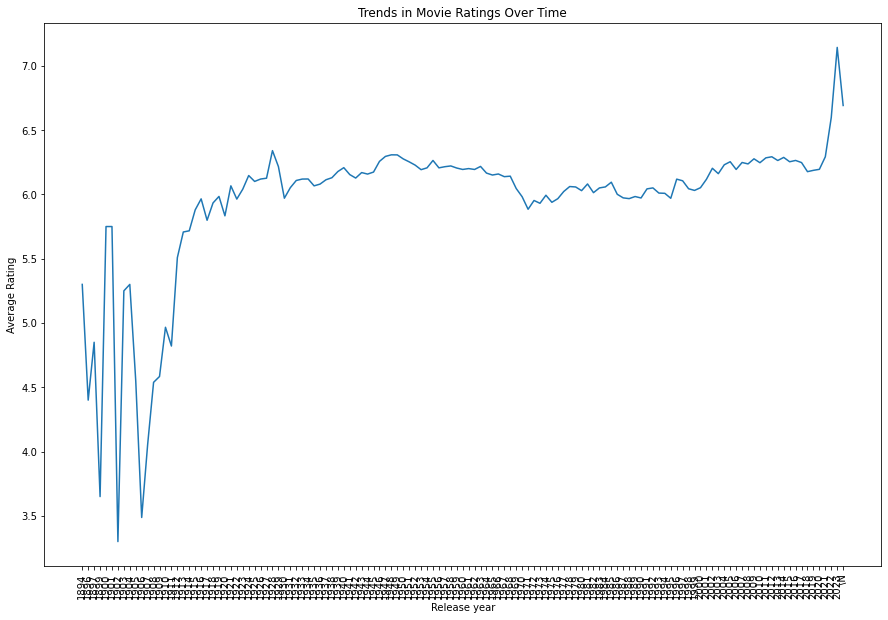

In [28]:
#Plotting trend in mvoie ratings over time
groupedby_sty_avg = merged_df.groupby(['startYear'])['averageRating'].mean()
plt.figure(figsize=(15,10))
plt.plot(groupedby_sty_avg)
plt.xlabel('Release year')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Trends in Movie Ratings Over Time')
plt.show()

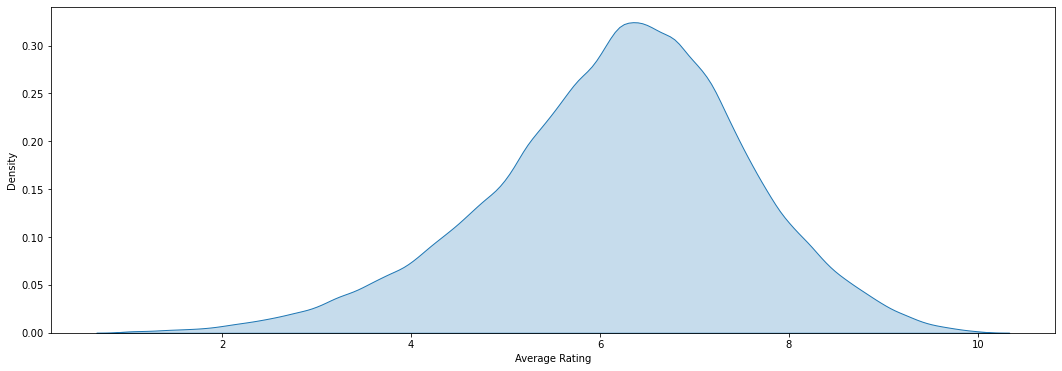

In [29]:
ax = sns.kdeplot(data=merged_df['averageRating'], shade=True)
ax.set(xlabel='Average Rating', ylabel='Density')
ax.figure.set_size_inches(18, 6)
plt.show()

In [30]:
file_path7 = "Data_Sources/title.crew.tsv.gz"
title_crew_df = pd.read_csv(file_path7, compression='gzip', sep='\t')
title_crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [31]:
file_path8 = "Data_Sources/name.basics.tsv.gz"
names_df = pd.read_csv(file_path8, compression='gzip', sep='\t')
names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0072308,tt0045537"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0071877,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0050986,tt0060827"


In [35]:
directors_df = pd.merge(title_crew_df,names_df,left_on='directors',right_on='nconst')
directors_df.tail()

,tconst,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
4449523,tt9916692,nm10538592,nm10538592,nm10538592,Andrzej Bartnikowski,\N,\N,NaN,tt9916692
4449524,tt9916698,nm10004116,nm10004116,nm10004116,Kostas Antarahas,\N,\N,"miscellaneous,director,writer","tt19894894,tt23184176,tt14896530,tt9916698"
4449525,tt9916730,nm10538612,nm10538612,nm10538612,Kiran Gawade,\N,\N,NaN,tt9916730
4449526,tt9916756,nm10538639,nm10538639,nm10538639,Brianna Laren,\N,\N,"director,actress,writer","tt9680432,tt9916756"
4449527,tt9916856,nm10538645,nm6951431,nm10538645,Johan Planefeldt,\N,\N,director,tt9916856


In [ ]:
directors_df

In [ ]:
merged_df[merged_df['tconst'].isin(names_df['knownForTitles'])]

In [ ]:
merged_df.head()

In [ ]:
names_df.head()

In [ ]:
for x in range(len(merged_df)):
    print(merged_df.iloc[x]['tconst'])